In [19]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.style as style

In [20]:
SURVEY_DIR = "../data/survey"
SURVEY_FILE = "../data/survey/survey_responses.csv"
N_QUESTIONS = 48
N_AI_QUESTIONS = 24

In [21]:
df = pd.read_csv(SURVEY_FILE)
n_respondant = len(df.index)

In [38]:
## Extract scores (total), scores AI (whose answers are AI), mean confidence and mean confidence AI
scores = pd.Series(np.zeros(n_respondant))
for i in range(1, N_QUESTIONS + 1):
    i = str(i)
    scores += (df['Q' + i] == df['K' + i]).astype(int)
df['Score'] = scores
df['Score norm'] = scores / N_QUESTIONS

scores_ai = pd.Series(np.zeros(n_respondant))
for i in range(1, N_QUESTIONS + 1):
    i = str(i)
    if df['K' + i].all() == 'AI':
        scores_ai += (df['Q' + i] == df['K' + i]).astype(int)
df['Score AI'] = scores_ai
df['Score AI norm'] = scores_ai / N_AI_QUESTIONS

df['Mean confidence'] = df[['C' + str(i) for i in range(1, N_QUESTIONS + 1)]].replace(\
                        {'Unsure' : 0.0, 'Somewhat confident' : 0.5, 'Very confident' : 1.0}).mean(axis=1)

df['Mean confidence AI'] = df[['C' + str(i) for i in range(1, N_QUESTIONS + 1) if df['K' + str(i)].all() == 'AI']]\
                        .replace({'Unsure' : 0.0, 'Somewhat confident' : 0.5, 'Very confident' : 1.0}).mean(axis=1)

N_RESPONDENTS = len(df.index)
df[['Age', 'Gender', 'Work status', 'Education', 'AI relation', \
    'Score', 'Score norm', 'Mean confidence', 'Score AI', \
    'Score AI norm', 'Mean confidence AI']]

,Age,Gender,Work status,Education,AI relation,Score,Score norm,Mean confidence,Score AI,Score AI norm,Mean confidence AI
0,25-34 years old,Male,Studying,Bachelor’s degree,5,37.0,0.770833,0.416667,21.0,0.875000,0.458333
1,18-24 years old,Female,Employed,Bachelor’s degree,5,35.0,0.729167,0.552083,15.0,0.625000,0.458333
2,18-24 years old,Male,Studying,Bachelor’s degree,5,32.0,0.666667,0.656250,15.0,0.625000,0.479167
3,18-24 years old,Female,Studying,Bachelor’s degree,4,45.0,0.937500,0.677083,23.0,0.958333,0.625000
4,18-24 years old,Male,Studying,High school,5,47.0,0.979167,1.000000,24.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
181,35-44 years old,Male,Employed,Master’s degree,4,41.0,0.854167,0.197917,23.0,0.958333,0.083333
182,25-34 years old,Male,Studying,College degree,3,37.0,0.770833,0.875000,16.0,0.666667,0.854167
183,25-34 years old,Male,Studying,Bachelor’s degree,3,33.0,0.687500,0.489583,13.0,0.541667,0.395833
184,18-24 years old,Female,Studying,Bachelor’s degree,3,34.0,0.708333,0.010417,20.0,0.833333,0.000000


In [23]:
df.sort_values(['Score AI'], ascending=False)

,Timestamp,Age,Gender,Work status,Education,AI relation,Score,Score norm,Mean confidence,Score AI,...,K39,K40,K41,K42,K43,K44,K45,K46,K47,K48
127,27/02/2020 22:34:59,25-34 years old,Male,Employed,Master’s degree,2,41.0,0.854167,0.500000,24.0,...,Human,AI,Human,AI,AI,Human,Human,AI,Human,Human
13,26/02/2020 17:02:15,18-24 years old,Male,Studying,Bachelor’s degree,4,40.0,0.833333,0.375000,24.0,...,Human,AI,Human,AI,AI,Human,Human,AI,Human,Human
101,27/02/2020 17:32:35,18-24 years old,Male,Studying,High school,4,45.0,0.937500,0.708333,24.0,...,Human,AI,Human,AI,AI,Human,Human,AI,Human,Human
118,27/02/2020 21:20:16,18-24 years old,Female,Studying,College degree,1,41.0,0.854167,0.468750,24.0,...,Human,AI,Human,AI,AI,Human,Human,AI,Human,Human
46,26/02/2020 19:39:43,18-24 years old,Male,Employed,Bachelor’s degree,5,30.0,0.625000,0.666667,24.0,...,Human,AI,Human,AI,AI,Human,Human,AI,Human,Human
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,27/02/2020 09:51:35,18-24 years old,Male,Studying,Trade/technical/vocational training,3,26.0,0.541667,0.145833,11.0,...,Human,AI,Human,AI,AI,Human,Human,AI,Human,Human
157,28/02/2020 12:15:50,18-24 years old,Female,Studying,College degree,2,26.0,0.541667,0.406250,10.0,...,Human,AI,Human,AI,AI,Human,Human,AI,Human,Human
98,27/02/2020 17:31:22,18-24 years old,Male,Studying,College degree,5,24.0,0.500000,0.895833,10.0,...,Human,AI,Human,AI,AI,Human,Human,AI,Human,Human
85,27/02/2020 16:05:39,25-34 years old,Male,Employed,Master’s degree,5,22.0,0.458333,0.677083,9.0,...,Human,AI,Human,AI,AI,Human,Human,AI,Human,Human


In [42]:
n_respondents = []
score_means = []
score_ai_means = []
conf_means = []
conf_ai_means = []

## All respondents
print("ALL:")
scores = df['Score']
score_norms = df['Score norm']
mean_confs = df['Mean confidence']
score_ais = df['Score AI']
score_ai_norms = df['Score AI norm']
mean_conf_ais = df['Mean confidence AI']
print('# of respondents:', len(scores))
print('Score mean: {:.4f}'.format(scores.mean()))
print('Score norms mean: {:.4f}'.format(score_norms.mean()))
print('Mean confidence mean: {:.4f}'.format(mean_confs.mean()))
print('Score ai mean: {:.4f}'.format(score_ais.mean()))
print('Score ai norms mean: {:.4f}'.format(score_ai_norms.mean()))
print('Mean confidence ai mean: {:.4f}'.format(mean_conf_ais.mean()))
print()
n_respondents.append(len(scores))
score_means.append(score_norms.mean())
score_ai_means.append(score_ai_norms.mean())
conf_means.append(mean_confs.mean())
conf_ai_means.append(mean_conf_ais.mean())

## AI relation
groups = df.groupby('AI relation')
for key, item in groups:
    print('AI relation:', key)
    scores = groups.get_group(key)['Score']
    score_norms = groups.get_group(key)['Score norm']
    mean_confs = groups.get_group(key)['Mean confidence']
    score_ais = groups.get_group(key)['Score AI']
    score_ai_norms = groups.get_group(key)['Score AI norm']
    mean_conf_ais = groups.get_group(key)['Mean confidence AI']
#     print(score_norms, "\n\n")
    print('# of respondants:', len(scores))
    print('Score mean: {:.4f}'.format(scores.mean()))
    print('Score norms mean: {:.4f}'.format(score_norms.mean()))
    print('Mean confidence mean: {:.4f}'.format(mean_confs.mean()))
    print('Score ai mean: {:.4f}'.format(score_ais.mean()))
    print('Score ai norms mean: {:.4f}'.format(score_ai_norms.mean()))
    print('Mean confidence ai mean: {:.4f}'.format(mean_conf_ais.mean()))
    print()
    
    n_respondents.append(len(scores))
    score_means.append(score_norms.mean())
    score_ai_means.append(score_ai_norms.mean())
    conf_means.append(mean_confs.mean())
    conf_ai_means.append(mean_conf_ais.mean())

ALL:
# of respondents: 186
Score mean: 35.4194
Score norms mean: 0.7379
Mean confidence mean: 0.6104
Score ai mean: 18.6935
Score ai norms mean: 0.7789
Mean confidence ai mean: 0.5839

AI relation: 1
# of respondants: 11
Score mean: 33.2727
Score norms mean: 0.6932
Mean confidence mean: 0.4025
Score ai mean: 17.5455
Score ai norms mean: 0.7311
Mean confidence ai mean: 0.3693

AI relation: 2
# of respondants: 15
Score mean: 33.8667
Score norms mean: 0.7056
Mean confidence mean: 0.5583
Score ai mean: 17.4667
Score ai norms mean: 0.7278
Mean confidence ai mean: 0.5347

AI relation: 3
# of respondants: 54
Score mean: 34.3148
Score norms mean: 0.7149
Mean confidence mean: 0.5972
Score ai mean: 18.0926
Score ai norms mean: 0.7539
Mean confidence ai mean: 0.5602

AI relation: 4
# of respondants: 48
Score mean: 35.1042
Score norms mean: 0.7313
Mean confidence mean: 0.5885
Score ai mean: 18.8958
Score ai norms mean: 0.7873
Mean confidence ai mean: 0.5560

AI relation: 5
# of respondants: 58
Sco

In [43]:
# for name, hex in matplotlib.colors.cnames.items():
#     if 'blue' in name:
#         print(name)

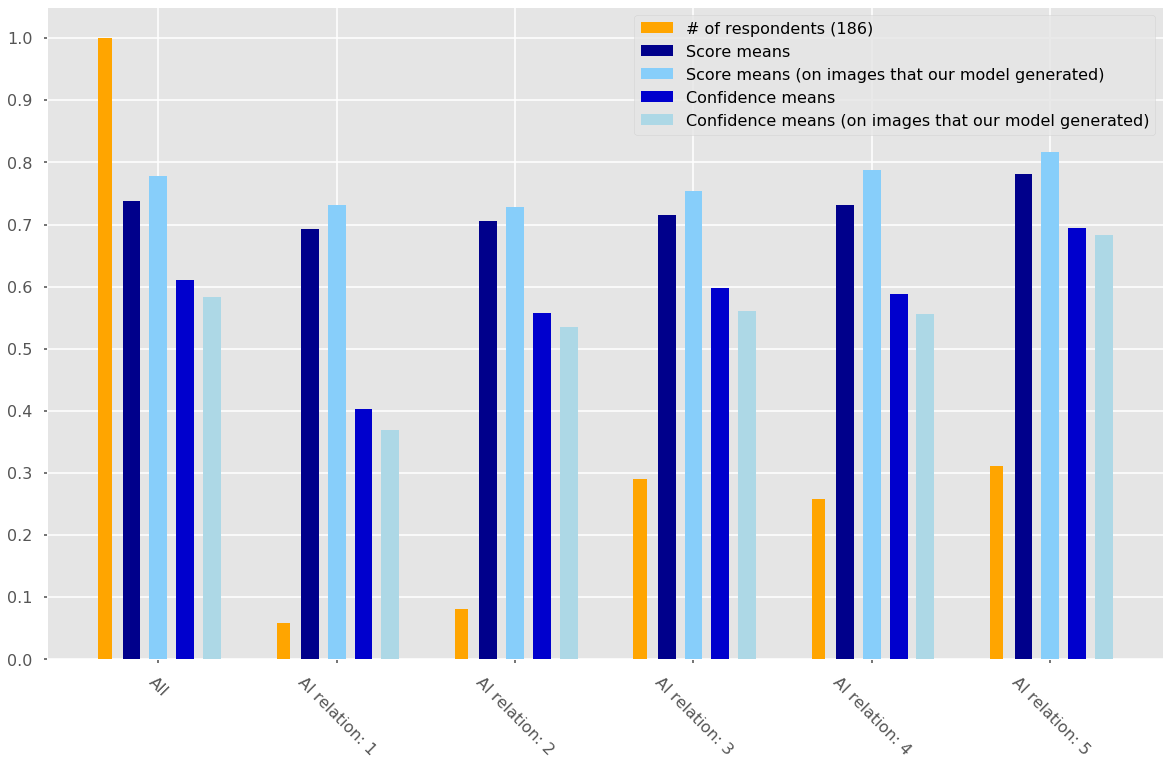

In [44]:
style.use('seaborn-poster')
style.use('ggplot')

labels = ['All', 'AI relation: 1', 'AI relation: 2', 'AI relation: 3', 'AI relation: 4', 'AI relation: 5']
xticks = np.arange(1, 13, 2)

plt.figure(figsize=(20, 12))

plt.bar(xticks - 0.60, np.array(n_respondents) / n_respondents[0], color='orange', width=0.15, label='# of respondents ({})'.format(N_RESPONDENTS))
plt.bar(xticks - 0.30, score_means, color='darkblue', width=0.20, label='Score means')
plt.bar(xticks - 0.00, score_ai_means, color='lightskyblue', width=0.20, label='Score means (on images that our model generated)')
plt.bar(xticks + 0.30, conf_means, color='mediumblue', width=0.20, label='Confidence means ')
plt.bar(xticks + 0.60, conf_ai_means, color='lightblue', width=0.20, label='Confidence means (on images that our model generated)')

plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.xticks(xticks, labels, rotation=-45)

plt.legend()

# plt.show()
plt.savefig("survey_ai_relation_results.png")

In [45]:
## Education
groups = df.groupby('Education')
for key, item in groups:
    print('Education:', key)
    scores = groups.get_group(key)['Score']
    score_norms = groups.get_group(key)['Score norm']
    score_ais = groups.get_group(key)['Score AI']
    score_ai_norms = groups.get_group(key)['Score AI norm']
#     print(score_norms, "\n\n")
    print('# of respondants:', len(scores))
    print('Score mean: {:.4f}'.format(scores.mean()))
    print('Score norms mean: {:.4f}'.format(score_norms.mean()))
    print('Score ai mean: {:.4f}'.format(score_ais.mean()))
    print('Score ai norms mean: {:.4f}'.format(score_ai_norms.mean()))
    print()

Education: Associate degree
# of respondants: 1
Score mean: 38.0000
Score norms mean: 0.7917
Score ai mean: 18.0000
Score ai norms mean: 0.7500

Education: Bachelor’s degree
# of respondants: 74
Score mean: 34.9054
Score norms mean: 0.7272
Score ai mean: 18.3649
Score ai norms mean: 0.7652

Education: College degree
# of respondants: 27
Score mean: 35.0000
Score norms mean: 0.7292
Score ai mean: 18.0741
Score ai norms mean: 0.7531

Education: Doctorate degree
# of respondants: 12
Score mean: 35.9167
Score norms mean: 0.7483
Score ai mean: 19.1667
Score ai norms mean: 0.7986

Education: Elementary school
# of respondants: 1
Score mean: 28.0000
Score norms mean: 0.5833
Score ai mean: 23.0000
Score ai norms mean: 0.9583

Education: High school
# of respondants: 22
Score mean: 36.3636
Score norms mean: 0.7576
Score ai mean: 18.9545
Score ai norms mean: 0.7898

Education: Master’s degree
# of respondants: 47
Score mean: 36.3404
Score norms mean: 0.7571
Score ai mean: 19.4255
Score ai norms 

In [46]:
## Gender
groups = df.groupby('Gender')
for key, item in groups:
    print('Gender:', key)
    scores = groups.get_group(key)['Score']
    score_norms = groups.get_group(key)['Score norm']
    score_ais = groups.get_group(key)['Score AI']
    score_ai_norms = groups.get_group(key)['Score AI norm']
#     print(score_norms, "\n\n")
    print('# of respondants:', len(scores))
    print('Score mean: {:.4f}'.format(scores.mean()))
    print('Score norms mean: {:.4f}'.format(score_norms.mean()))
    print('Score ai mean: {:.4f}'.format(score_ais.mean()))
    print('Score ai norms mean: {:.4f}'.format(score_ai_norms.mean()))
    print()

Gender: Female
# of respondants: 71
Score mean: 34.9859
Score norms mean: 0.7289
Score ai mean: 18.2958
Score ai norms mean: 0.7623

Gender: Male
# of respondants: 109
Score mean: 35.8073
Score norms mean: 0.7460
Score ai mean: 18.8532
Score ai norms mean: 0.7856

Gender: Non-binary/third gender
# of respondants: 3
Score mean: 35.3333
Score norms mean: 0.7361
Score ai mean: 21.0000
Score ai norms mean: 0.8750

Gender: Prefer not to say
# of respondants: 3
Score mean: 31.6667
Score norms mean: 0.6597
Score ai mean: 20.0000
Score ai norms mean: 0.8333



In [47]:
## Work status
groups = df.groupby('Work status')
for key, item in groups:
    print('Gender:', key)
    scores = groups.get_group(key)['Score']
    score_norms = groups.get_group(key)['Score norm']
    score_ais = groups.get_group(key)['Score AI']
    score_ai_norms = groups.get_group(key)['Score AI norm']
#     print(score_norms, "\n\n")
    print('# of respondants:', len(scores))
    print('Score mean: {:.4f}'.format(scores.mean()))
    print('Score norms mean: {:.4f}'.format(score_norms.mean()))
    print('Score ai mean: {:.4f}'.format(score_ais.mean()))
    print('Score ai norms mean: {:.4f}'.format(score_ai_norms.mean()))
    print()

Gender: Employed
# of respondants: 78
Score mean: 35.6667
Score norms mean: 0.7431
Score ai mean: 18.7051
Score ai norms mean: 0.7794

Gender: Interning
# of respondants: 2
Score mean: 30.0000
Score norms mean: 0.6250
Score ai mean: 17.5000
Score ai norms mean: 0.7292

Gender: Other
# of respondants: 7
Score mean: 33.0000
Score norms mean: 0.6875
Score ai mean: 17.7143
Score ai norms mean: 0.7381

Gender: Part-time
# of respondants: 7
Score mean: 34.2857
Score norms mean: 0.7143
Score ai mean: 17.0000
Score ai norms mean: 0.7083

Gender: Self-employed/Freelance
# of respondants: 5
Score mean: 32.8000
Score norms mean: 0.6833
Score ai mean: 19.2000
Score ai norms mean: 0.8000

Gender: Studying
# of respondants: 86
Score mean: 35.7558
Score norms mean: 0.7449
Score ai mean: 18.8837
Score ai norms mean: 0.7868

Gender: Unemployed
# of respondants: 1
Score mean: 36.0000
Score norms mean: 0.7500
Score ai mean: 20.0000
Score ai norms mean: 0.8333



In [48]:
n_respondents = []
score_means = []
score_ai_means = []
conf_means = []
conf_ai_means = []

## All respondents
print("ALL:")
scores = df['Score']
score_norms = df['Score norm']
mean_confs = df['Mean confidence']
score_ais = df['Score AI']
score_ai_norms = df['Score AI norm']
mean_conf_ais = df['Mean confidence AI']
print('# of respondents:', len(scores))
print('Score mean: {:.4f}'.format(scores.mean()))
print('Score norms mean: {:.4f}'.format(score_norms.mean()))
print('Mean confidence mean: {:.4f}'.format(mean_confs.mean()))
print('Score ai mean: {:.4f}'.format(score_ais.mean()))
print('Score ai norms mean: {:.4f}'.format(score_ai_norms.mean()))
print('Mean confidence ai mean: {:.4f}'.format(mean_conf_ais.mean()))
print()
n_respondents.append(len(scores))
score_means.append(score_norms.mean())
score_ai_means.append(score_ai_norms.mean())
conf_means.append(mean_confs.mean())
conf_ai_means.append(mean_conf_ais.mean())

## Age
df_age = df.replace({'Under 12 years old' : '0-25',
                     '12-17 years old' : '0-25',
                     '18-24 years old' : '0-25',
                     '35-44 years old' : 'Above 34',
                     '45-54 years old' : 'Above 34',
                     '55-64 years old' : 'Above 34',
                     '65-74 years old' : 'Above 34',
                     '75 years or older' : 'Above 34',
                    }
                   )
groups = df_age.groupby('Age')
for key, item in groups:
    print('Age:', key)
    scores = groups.get_group(key)['Score']
    score_norms = groups.get_group(key)['Score norm']
    mean_confs = groups.get_group(key)['Mean confidence']
    score_ais = groups.get_group(key)['Score AI']
    score_ai_norms = groups.get_group(key)['Score AI norm']
    mean_conf_ais = groups.get_group(key)['Mean confidence AI']
#     print(score_norms, "\n\n")
    print('# of respondants:', len(scores))
    print('Score mean: {:.4f}'.format(scores.mean()))
    print('Score norms mean: {:.4f}'.format(score_norms.mean()))
    print('Mean confidence mean: {:.4f}'.format(mean_confs.mean()))
    print('Score ai mean: {:.4f}'.format(score_ais.mean()))
    print('Score ai norms mean: {:.4f}'.format(score_ai_norms.mean()))
    print('Mean confidence ai mean: {:.4f}'.format(mean_conf_ais.mean()))
    print()
    
    n_respondents.append(len(scores))
    score_means.append(score_norms.mean())
    score_ai_means.append(score_ai_norms.mean())
    conf_means.append(mean_confs.mean())
    conf_ai_means.append(mean_conf_ais.mean())

ALL:
# of respondents: 186
Score mean: 35.4194
Score norms mean: 0.7379
Mean confidence mean: 0.6104
Score ai mean: 18.6935
Score ai norms mean: 0.7789
Mean confidence ai mean: 0.5839

Age: 0-25
# of respondants: 88
Score mean: 35.2500
Score norms mean: 0.7344
Mean confidence mean: 0.6075
Score ai mean: 18.5227
Score ai norms mean: 0.7718
Mean confidence ai mean: 0.5803

Age: 25-34 years old
# of respondants: 71
Score mean: 35.0986
Score norms mean: 0.7312
Mean confidence mean: 0.6228
Score ai mean: 18.5211
Score ai norms mean: 0.7717
Mean confidence ai mean: 0.6001

Age: Above 34
# of respondants: 27
Score mean: 36.8148
Score norms mean: 0.7670
Mean confidence mean: 0.5872
Score ai mean: 19.7037
Score ai norms mean: 0.8210
Mean confidence ai mean: 0.5532



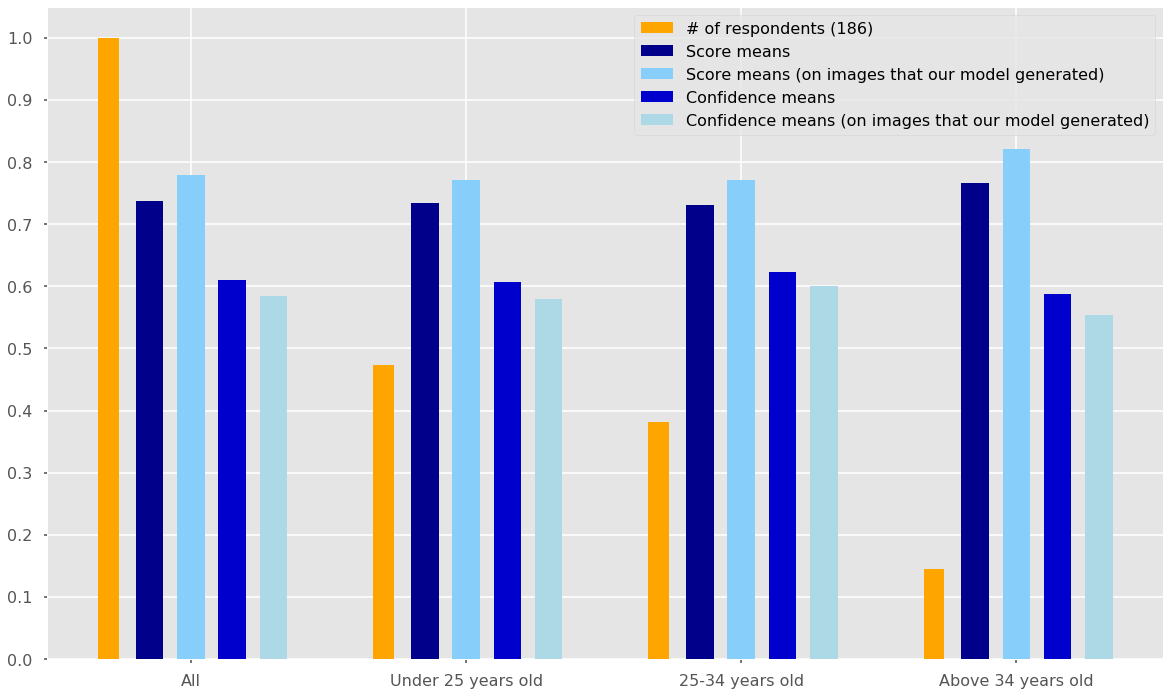

In [49]:
style.use('seaborn-poster')
style.use('ggplot')

labels = ['All', 'Under 25 years old', '25-34 years old', 'Above 34 years old']
xticks = np.arange(1, 9, 2)

plt.figure(figsize=(20, 12))

plt.bar(xticks - 0.60, np.array(n_respondents) / n_respondents[0], color='orange', width=0.15, label='# of respondents ({})'.format(N_RESPONDENTS))
plt.bar(xticks - 0.30, score_means, color='darkblue', width=0.20, label='Score means')
plt.bar(xticks - 0.00, score_ai_means, color='lightskyblue', width=0.20, label='Score means (on images that our model generated)')
plt.bar(xticks + 0.30, conf_means, color='mediumblue', width=0.20, label='Confidence means ')
plt.bar(xticks + 0.60, conf_ai_means, color='lightblue', width=0.20, label='Confidence means (on images that our model generated)')

plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.xticks(xticks, labels)

plt.legend()

# plt.show()
plt.savefig("survey_age_results.png")

In [50]:
## Question analysis (most confused)
df_questions = pd.DataFrame(columns=['Question', 'Correct sum', 'Correct sum rate'])
for i in range(1, N_QUESTIONS + 1):
    _i = str(i)
    question_scores = (df['Q' + _i] == df['K' + _i]).astype(int)
#     question_scores = ((df['Q' + _i] == df['K' + _i]) & (df['C' + _i] == 'Very confident')).astype(int)
    correct_sum = question_scores.sum()
    df_questions.loc[i] = [_i, correct_sum, correct_sum / n_respondant]
# df_questions
df_questions.sort_values(['Correct sum'])

,Question,Correct sum,Correct sum rate
11,11,43,0.231183
8,8,76,0.408602
3,3,77,0.413978
28,28,78,0.419355
1,1,91,0.489247
12,12,100,0.537634
48,48,103,0.553763
14,14,111,0.596774
16,16,113,0.607527
26,26,115,0.618280


In [55]:
## Question analysis (most confused AI)
df_ai_questions = pd.DataFrame(columns=['Question', 'Correct sum', 'Correct sum rate'])
for i in range(1, N_QUESTIONS + 1):
    _i = str(i)
    if df['K' + _i].all() == 'AI':
        question_scores = (df['Q' + _i] == df['K' + _i]).astype(int)
    #     question_scores = ((df['Q' + _i] == df['K' + _i]) & (df['C' + _i] == 'Very confident')).astype(int)
        correct_sum = question_scores.sum()
        df_ai_questions.loc[i] = [_i, correct_sum, correct_sum / n_respondant]

df_ai_questions.sort_values(['Correct sum'])
# 1.0 - df_ai_questions.sort_values(['Correct sum'])['Correct sum rate']

,Question,Correct sum,Correct sum rate
12,12,100,0.537634
14,14,111,0.596774
16,16,113,0.607527
26,26,115,0.618280
5,5,129,0.693548
31,31,136,0.731183
6,6,137,0.736559
19,19,141,0.758065
27,27,142,0.763441
9,9,145,0.779570


In [57]:
## Question analysis (most confused Human)
df_human_questions = pd.DataFrame(columns=['Question', 'Correct sum', 'Correct sum rate'])
for i in range(1, N_QUESTIONS + 1):
    _i = str(i)
    if df['K' + _i].all() == 'Human':
        question_scores = (df['Q' + _i] == df['K' + _i]).astype(int)
    #     question_scores = ((df['Q' + _i] == df['K' + _i]) & (df['C' + _i] == 'Very confident')).astype(int)
        correct_sum = question_scores.sum()
        df_human_questions.loc[i] = [_i, correct_sum, correct_sum / n_respondant]

df_human_questions.sort_values(['Correct sum'])
# 1.0 - df_human_questions.sort_values(['Correct sum'])['Correct sum rate']

,Question,Correct sum,Correct sum rate
11,11,43,0.231183
8,8,76,0.408602
3,3,77,0.413978
28,28,78,0.419355
1,1,91,0.489247
48,48,103,0.553763
39,39,122,0.655914
15,15,135,0.725806
47,47,135,0.725806
45,45,135,0.725806
